# Baseline - Part 4: Testing Set Results

**Environment setup**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import functions

In [19]:
def model_evaluation(train,test,finalmodel):
    finalmodel.fit(train,y_train)
    predict_test = finalmodel.predict(test)
    functions.confusion_final(predict_test,y_test)
    print(f1_score(y_test,predict_test,average='macro'))

In [9]:
#Load training and testing sets
Train = pd.read_csv(r'Train_trad.csv',low_memory=False,encoding='latin1')
Test = pd.read_csv(r'Test_trad.csv',low_memory=False,encoding='latin1')

## 1. Testing Set Result Before Feature Selection

In [11]:
#Prepare Final DataFrame and get the X, y for training and testing respectively
Train.index = Train['Unnamed: 0'].values
Train = functions.drop_column(Train,['Unnamed: 0','local_rule_creation_date'])
Test.index = Test['Unnamed: 0'].values
Test = functions.drop_column(Test,['Unnamed: 0','local_rule_creation_date'])
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]
y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

              precision    recall  f1-score   support

           0    0.97049   0.96890   0.96970       611
           1    0.96212   1.00000   0.98069       127
           2    1.00000   0.20000   0.33333         5
           3    0.97701   0.99415   0.98551       171
           4    1.00000   1.00000   1.00000         5
           5    1.00000   1.00000   1.00000        17
           6    0.91304   0.75000   0.82353        28
           7    0.94828   1.00000   0.97345        55
           8    1.00000   0.97917   0.98947        48
           9    0.75000   1.00000   0.85714         6
          10    0.95714   0.91781   0.93706        73
          11    0.98283   0.98707   0.98495       232
          12    0.72727   1.00000   0.84211         8
          13    0.96667   0.96026   0.96346       151
          14    1.00000   0.88889   0.94118         9
          15    1.00000   1.00000   1.00000         1
          16    1.00000   0.85714   0.92308         7

    accuracy              

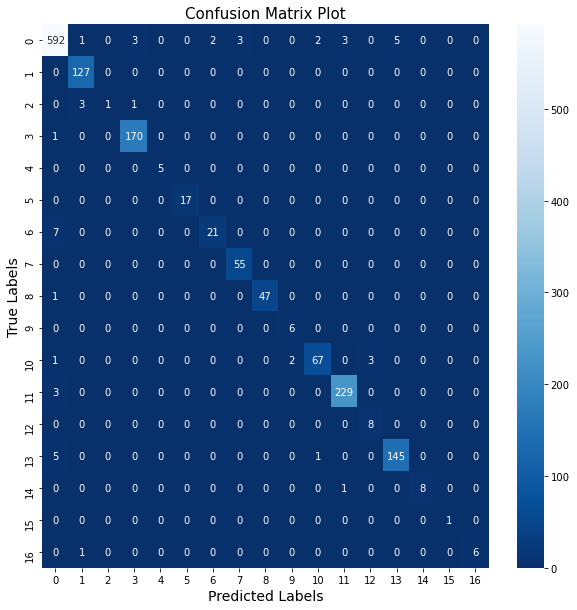

In [11]:
#Final model found in model selection stage
finalmodel = MLPClassifier(activation= 'relu',alpha= 0.05,hidden_layer_sizes= (200,200),learning_rate= 'constant',solver= 'adam')
model_evaluation(X_train,X_test,finalmodel)

## 2. Testing Set Result After Feature Selection

In [12]:
#Prepare Final DataFrame after feature selection and remove less important variables
Train_select = functions.drop_column(Train,['foreign_binary', 'account_binary'])
Test_select = functions.drop_column(Test,['foreign_binary', 'account_binary'])
X_train_sel = Train_select.iloc[:,:-1]
X_test_sel = Test_select.iloc[:,:-1]
y_train = Train_select.iloc[:,-1]
y_test = Test_select.iloc[:,-1]

              precision    recall  f1-score   support

           0    0.97844   0.96563   0.97199       611
           1    0.96212   1.00000   0.98069       127
           2    1.00000   0.20000   0.33333         5
           3    0.98266   0.99415   0.98837       171
           4    1.00000   1.00000   1.00000         5
           5    1.00000   1.00000   1.00000        17
           6    0.95455   0.75000   0.84000        28
           7    0.94828   1.00000   0.97345        55
           8    1.00000   0.97917   0.98947        48
           9    0.80000   0.66667   0.72727         6
          10    0.93421   0.97260   0.95302        73
          11    0.98298   0.99569   0.98929       232
          12    0.88889   1.00000   0.94118         8
          13    0.94231   0.97351   0.95765       151
          14    1.00000   0.88889   0.94118         9
          15    1.00000   1.00000   1.00000         1
          16    1.00000   0.85714   0.92308         7

    accuracy              

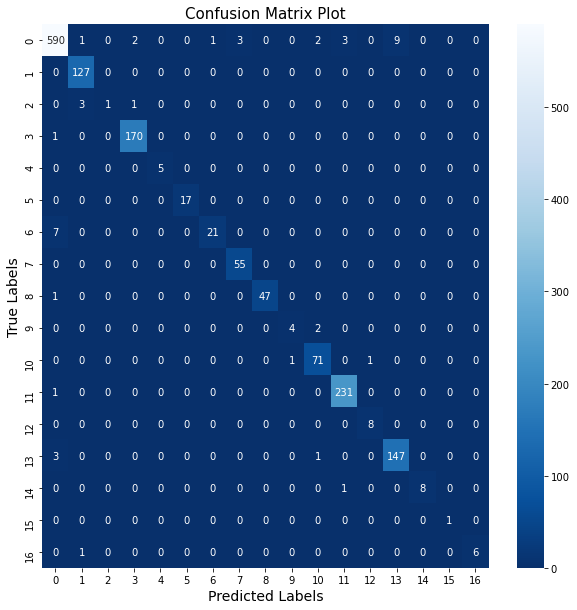

In [13]:
model_evaluation(X_train_sel,X_test_sel,finalmodel)